In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/golf-dataset.csv")

In [3]:
data

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [4]:
data.columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayBall']

In [5]:
data.head()

,Outlook,Temperature,Humidity,Wind,PlayBall
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [6]:
data['Outlook'].unique()

array(['Rainy', 'Overcast', 'Sunny'], dtype=object)

In [7]:
# Convert to numerice
Out={'Rainy':2, 'Overcast':1, 'Sunny':0}

In [8]:
data['Outlook']=data['Outlook'].map(lambda x:Out[x])

In [9]:
data.head()

,Outlook,Temperature,Humidity,Wind,PlayBall
0,2,Hot,High,False,No
1,2,Hot,High,True,No
2,1,Hot,High,False,Yes
3,0,Mild,High,False,Yes
4,0,Cool,Normal,False,Yes


In [10]:
data['Temperature'] = data['Temperature'].map({'Hot': 0, 'Mild': 1, 'Cool': 2})


In [11]:
data['Temperature'].unique()

array([0, 1, 2])

In [12]:
data['Humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [13]:
data['Humidity'] = data['Humidity'].map({'High': 0, 'Normal': 1 })


In [14]:
  data

,Outlook,Temperature,Humidity,Wind,PlayBall
0,2,0,0,False,No
1,2,0,0,True,No
2,1,0,0,False,Yes
3,0,1,0,False,Yes
4,0,2,1,False,Yes
5,0,2,1,True,No
6,1,2,1,True,Yes
7,2,1,0,False,No
8,2,2,1,False,Yes
9,0,1,1,False,Yes


In [15]:
data['Wind'] = data['Wind'].map(lambda x: 0 if x=='True' else 1)

In [16]:
data['PlayBall'] = data['PlayBall'].map({'No': 0, 'Yes': 1 })

In [17]:
  data.head()

,Outlook,Temperature,Humidity,Wind,PlayBall
0,2,0,0,1,0
1,2,0,0,1,0
2,1,0,0,1,1
3,0,1,0,1,1
4,0,2,1,1,1


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model=DecisionTreeClassifier()

In [20]:
model.fit(data.iloc[:,1:4],data.iloc[:,4])

DecisionTreeClassifier()

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

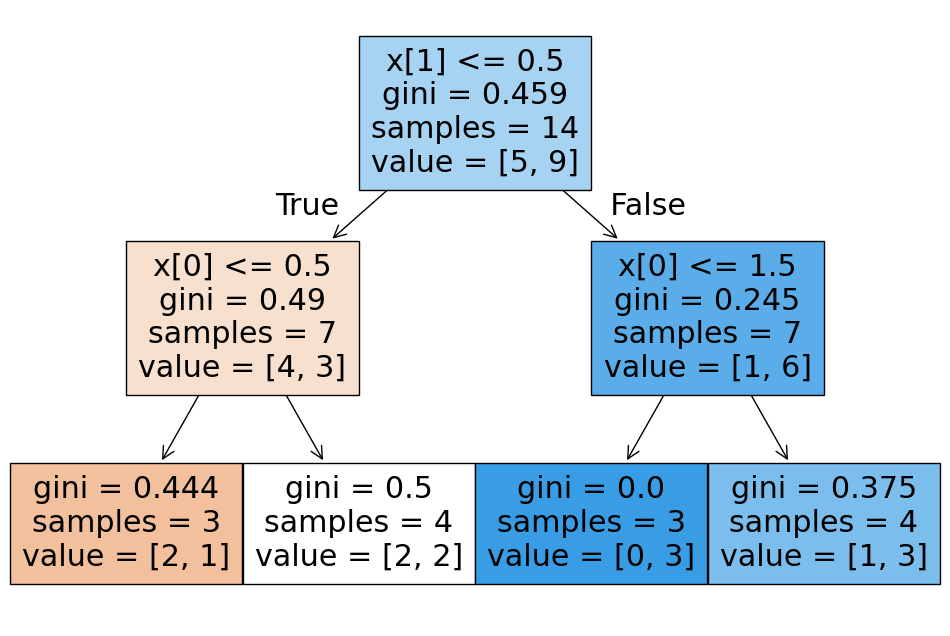

In [22]:
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True)


[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'), Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'), Text(0.375, 0.6666666666666667, 'True  '), Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'), Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'), Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'), Text(0.625, 0.6666666666666667, '  False'), Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]


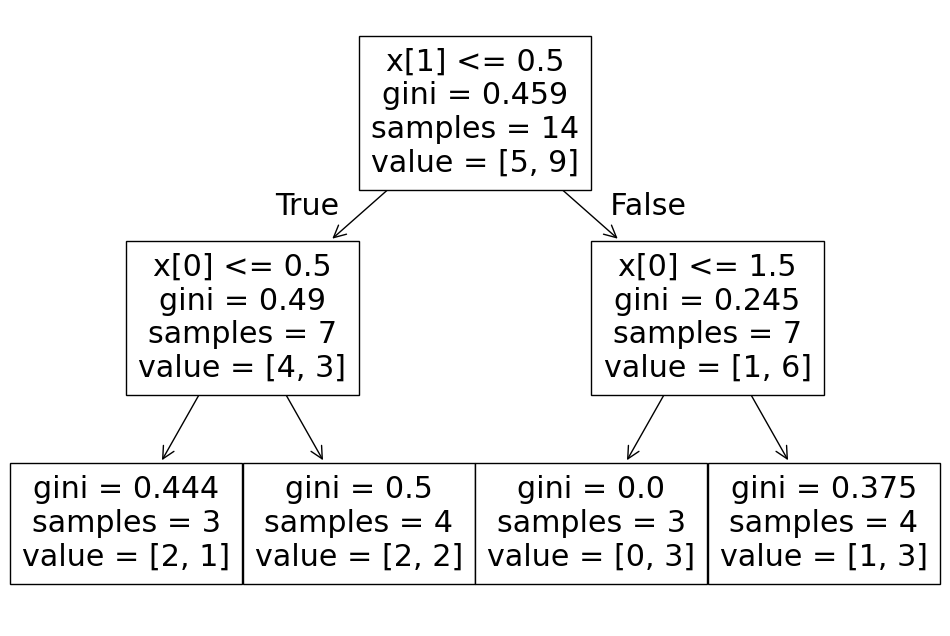

In [23]:
plt.figure(figsize=(12,8))
print(tree.plot_tree(model))

In [26]:
from sklearn.tree import export_graphviz

In [35]:
#feature_names = ['Outlook','Temperature',	'Humidity',	'Wind'	]  # Fixed the typo
out = ['yes', 'no']
dot = export_graphviz(decision_tree=model, out_file='Golf.dot',  class_names=out)


In [39]:
! dot -Tpng Golf.dot -o Golf.png